In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from llops import Roi
from comptic import noise, simulation
import matplotlib.pyplot as plt
import numpy as np

## Very Basic Simulation

In [7]:
# Generate signal
signal = simulation.testObject('ucbseal', dtype='float32')

# Define signal-less ROI for noise calculations
noise_roi = roi.Roi(shape=(10,10))

# Define SNR
snr = 100

# Add noise with SNR
noisy_signal= noise.add(signal, 'gaussian', snr=snr)

# Calculate SNR
print(noise.snr(noisy_signal, noise_roi=noise_roi))

(101.38819470978514+0j)


## Load Test Object and Add Noise

<IPython.core.display.Javascript object>


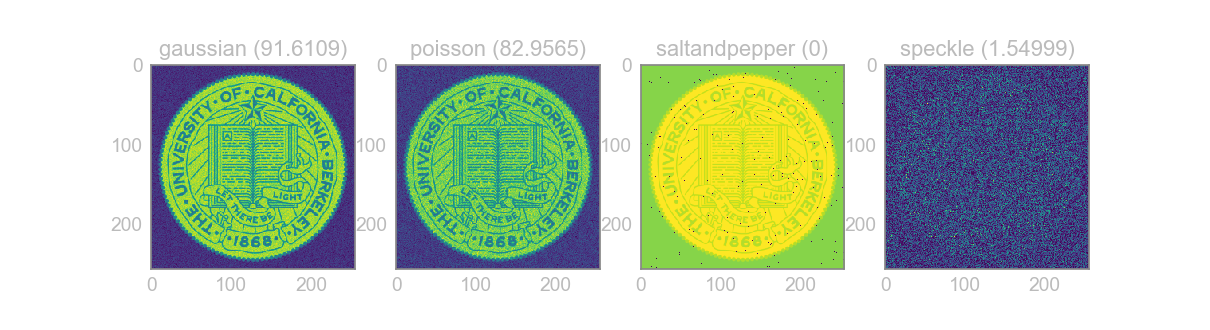

..\noise.py:50: RuntimeWarning: divide by zero encountered in float_scalars
  signal_std = np.std(signal_std) if noise_roi is None else np.std(signal[noise_roi.y_start:noise_roi.y_end,


In [92]:
# Generate signal
signal = simulation.testObject('ucbseal', dtype='float32') * 1000

# Define SNR
snr = 100

# Generate noisy signals
noisy_signals = {}
for noise_type in noise.valid_noise_models:
    noisy_signals[noise_type] = noise.add(signal, noise_type, snr=snr)

# Show result
plt.figure(figsize=(11,3))
for index, noise_type in enumerate(noise.valid_noise_models):
    plt.subplot(1, len(noise.valid_noise_models), index + 1)
    plt.imshow(np.abs(noisy_signals[noise_type]))
    measured_snr = noise.snr(np.abs(noisy_signals[noise_type]), noise_roi=noise_roi)
    plt.title(noise_type + ' (%g)' % measured_snr)